<a href="https://colab.research.google.com/github/MichaelMcCarey/WildfiresProject/blob/main/WildfiresProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importing the wildfires datasets i put in github
training = 'https://raw.githubusercontent.com/MichaelMcCarey/WildfiresProject/main/wildfires_training.csv'
training_data = pd.read_csv(training)
test = 'https://raw.githubusercontent.com/MichaelMcCarey/WildfiresProject/main/wildfires_test.csv'
test_data = pd.read_csv(test)

In [2]:
# importing algorithims from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [3]:
# test to make sure data was imported successfully
print(training_data.head())
print(test_data.head())
print(training_data.shape)
print(test_data.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31       

In [4]:
# seperate the independent and dependent variables
independent_cols = ['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']
dependent_cols = ['fire']

In [5]:
# set up matrix x and vector y for the training data
X_training = training_data[independent_cols]
y_training = training_data[dependent_cols]

In [6]:
# set up matrix x and vector y for the test data
X_test = test_data[independent_cols]
y_test = test_data[dependent_cols]

In [7]:
# test to make sure matrix is set up successfully
print(X_training.shape)
print(X_test.shape)
print(y_training.shape)
print(y_test.shape)

(154, 9)
(50, 9)
(154, 1)
(50, 1)


In [8]:
# creating logistic regression model with default settings
model = LogisticRegression()
model.fit(X_training, y_training)

# predictions
predictions_training = model.predict(X_training)
predictions_test = model.predict(X_test)

# accuracy on the predictions
accuracy_training = metrics.accuracy_score(y_training, predictions_training)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)

print('Accuracy on training data: ', accuracy_training)
print('Accuracy on test data: ', accuracy_test)

Accuracy on training data:  0.8961038961038961
Accuracy on test data:  0.88


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# since i am getting a message about changing the shape of y, and also being told to increase the max_iter, i will be changing it as suggested and using the new version as the actual default accuracy
y_training = y_training.values.ravel()
y_test = y_test.values.ravel()

#new model fixed
model = LogisticRegression(max_iter=10000) # this is high but it finally got rid of the message for all future code
model.fit(X_training, y_training)

# predictions
predictions_training = model.predict(X_training)
predictions_test = model.predict(X_test)

# accuracy on the predictions
accuracy_training = metrics.accuracy_score(y_training, predictions_training)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)

print(f'Accuracy on training data:  {round(accuracy_training,3)}') # using this to limit accuracy results to 3 decimals for neatness
print('Accuracy on test data: ', accuracy_test)

Accuracy on training data:  0.909
Accuracy on test data:  0.9


In [10]:
# tune hyperparameters
C_values = [0.01, 0.1, 0.5, 1, 5, 10, 100] # chose wide range for C to explore how it effects accuracy, noticed best results came from around 1 so i added 0.5 and 5 later to see if they gave better results
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] # the options for solvers from sci kit
logistic_chart = [] # will use to make a chart

# this loop will print out a list of how each combination of the hyperparameters performed
for c in C_values:
  for solver in solvers:
        model = LogisticRegression(C=c, solver=solver, max_iter=10000) # max_iter not a hyperparameter since i am keeping it consistent with my default logistic regression
        model.fit(X_training, y_training)
        accuracy_training = metrics.accuracy_score(y_training, model.predict(X_training))
        accuracy_test = metrics.accuracy_score(y_test, model.predict(X_test))
        logistic_chart.append([c, solver, accuracy_training, accuracy_test])
        print(f"C={c}, solver='{solver}', Accuracy on training data: {round(accuracy_training,3)}, Accuracy on test data: {round(accuracy_test,3)}")

C=0.01, solver='lbfgs', Accuracy on training data: 0.883, Accuracy on test data: 0.84
C=0.01, solver='liblinear', Accuracy on training data: 0.883, Accuracy on test data: 0.84
C=0.01, solver='newton-cg', Accuracy on training data: 0.883, Accuracy on test data: 0.84
C=0.01, solver='newton-cholesky', Accuracy on training data: 0.87, Accuracy on test data: 0.82
C=0.01, solver='sag', Accuracy on training data: 0.87, Accuracy on test data: 0.82
C=0.01, solver='saga', Accuracy on training data: 0.87, Accuracy on test data: 0.82
C=0.1, solver='lbfgs', Accuracy on training data: 0.896, Accuracy on test data: 0.82
C=0.1, solver='liblinear', Accuracy on training data: 0.896, Accuracy on test data: 0.82
C=0.1, solver='newton-cg', Accuracy on training data: 0.89, Accuracy on test data: 0.82
C=0.1, solver='newton-cholesky', Accuracy on training data: 0.883, Accuracy on test data: 0.82
C=0.1, solver='sag', Accuracy on training data: 0.883, Accuracy on test data: 0.82
C=0.1, solver='saga', Accuracy o

In [11]:
logistic_chart = pd.DataFrame(logistic_chart, columns=['C', 'Solver', 'Training accuracy', 'Test accuracy']) # gives column names
logistic_chart = logistic_chart.sort_values(by=['Test accuracy'], ascending=False) # so the highest test accuracy is at the top
logistic_chart

,C,Solver,Training accuracy,Test accuracy
20,1.00,newton-cg,0.902597,0.90
21,1.00,newton-cholesky,0.889610,0.90
26,5.00,newton-cg,0.922078,0.90
27,5.00,newton-cholesky,0.915584,0.90
18,1.00,lbfgs,0.909091,0.90
19,1.00,liblinear,0.909091,0.90
25,5.00,liblinear,0.922078,0.90
24,5.00,lbfgs,0.922078,0.90
38,100.00,newton-cg,0.922078,0.88
39,100.00,newton-cholesky,0.915584,0.88


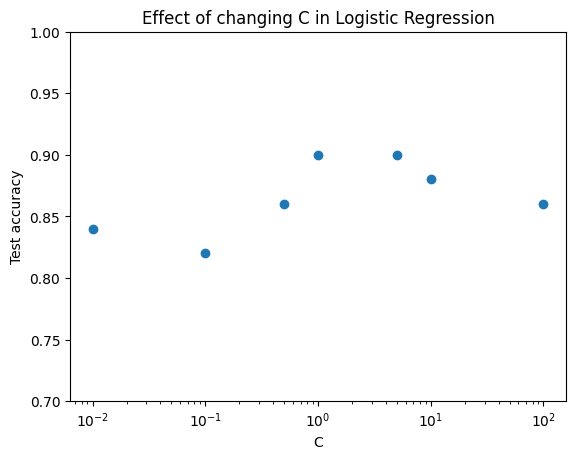

In [12]:
# to show effect of changing C with a constant solver with default 'lbfgs'
logistic_chart_C = logistic_chart[logistic_chart['Solver'] == 'lbfgs']
# create scatterplot
plt.scatter(logistic_chart_C['C'], logistic_chart_C['Test accuracy'])
plt.xlabel('C')
plt.xscale('log') # doing this to better scale the plot even though it will cause x axis labels to be different
plt.ylabel('Test accuracy')
plt.ylim(.7, 1) # to better show the effect
plt.title('Effect of changing C in Logistic Regression')
plt.show()


In [13]:
logistic_chart_C

,C,Solver,Training accuracy,Test accuracy
18,1.00,lbfgs,0.909091,0.90
24,5.00,lbfgs,0.922078,0.90
30,10.00,lbfgs,0.922078,0.88
36,100.00,lbfgs,0.928571,0.86
12,0.50,lbfgs,0.896104,0.86
0,0.01,lbfgs,0.883117,0.84
6,0.10,lbfgs,0.896104,0.82


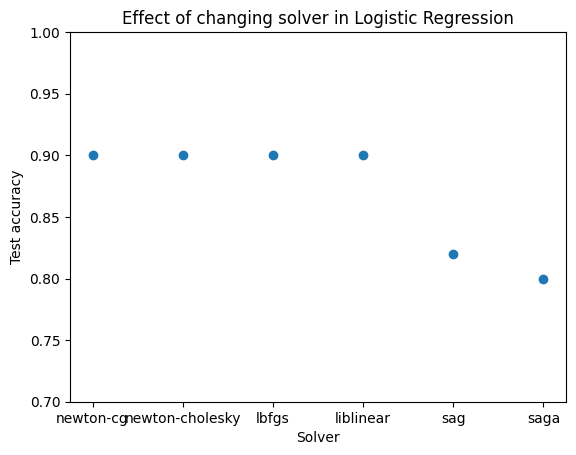

In [14]:
# to show effect of changing solver with a constant C with default = 1
logistic_chart_solver =  logistic_chart[logistic_chart['C'] == 1]
# create scatter plot
plt.scatter(logistic_chart_solver['Solver'], logistic_chart_solver['Test accuracy'])
plt.xlabel('Solver')
plt.ylabel('Test accuracy')
plt.ylim(.7, 1)
plt.title('Effect of changing solver in Logistic Regression')
plt.show()

In [15]:
logistic_chart_solver

,C,Solver,Training accuracy,Test accuracy
20,1.0,newton-cg,0.902597,0.90
21,1.0,newton-cholesky,0.889610,0.90
18,1.0,lbfgs,0.909091,0.90
19,1.0,liblinear,0.909091,0.90
22,1.0,sag,0.870130,0.82
23,1.0,saga,0.870130,0.80


Best results: C = 1 or 5, solver = 'lbfgs' or 'liblinear' or 'newton-cg' or 'newton-cholesky'. Will work for any of these pairs.
So, the tuning can be left at the default for best results in this case

In [16]:
# creating SVC model with default settings
model = SVC()
model.fit(X_training, y_training)

# predictions
predictions_training = model.predict(X_training)
predictions_test = model.predict(X_test)

# accuracy on predictions
accuracy_training = metrics.accuracy_score(y_training, predictions_training)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)

print(f'Accuracy on training data:  {round(accuracy_training,3)}')
print(f'Accuracy on test data: {round(accuracy_test,3)}')

Accuracy on training data:  0.513
Accuracy on test data: 0.56


In [17]:
# tune hyperparameters
C_values = [0.01, 0.1, 0.5, 1, 5, 10, 100]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
SVC_chart = []

for c in C_values:
  for kernel in kernels:
    model = SVC(C=c, kernel=kernel)
    model.fit(X_training, y_training)
    accuracy_training = metrics.accuracy_score(y_training, model.predict(X_training))
    accuracy_test = metrics.accuracy_score(y_test, model.predict(X_test))
    SVC_chart.append([c, kernel, accuracy_training, accuracy_test])
    print(f"C={c}, kernel='{kernel}', Accuracy on training data: {round(accuracy_training,3)}, Accuracy on test data: {round(accuracy_test,3)}")

C=0.01, kernel='linear', Accuracy on training data: 0.89, Accuracy on test data: 0.84
C=0.01, kernel='poly', Accuracy on training data: 0.513, Accuracy on test data: 0.56
C=0.01, kernel='rbf', Accuracy on training data: 0.513, Accuracy on test data: 0.56
C=0.01, kernel='sigmoid', Accuracy on training data: 0.513, Accuracy on test data: 0.56
C=0.1, kernel='linear', Accuracy on training data: 0.903, Accuracy on test data: 0.86
C=0.1, kernel='poly', Accuracy on training data: 0.513, Accuracy on test data: 0.56
C=0.1, kernel='rbf', Accuracy on training data: 0.513, Accuracy on test data: 0.56
C=0.1, kernel='sigmoid', Accuracy on training data: 0.513, Accuracy on test data: 0.56
C=0.5, kernel='linear', Accuracy on training data: 0.89, Accuracy on test data: 0.86
C=0.5, kernel='poly', Accuracy on training data: 0.513, Accuracy on test data: 0.56
C=0.5, kernel='rbf', Accuracy on training data: 0.513, Accuracy on test data: 0.56
C=0.5, kernel='sigmoid', Accuracy on training data: 0.513, Accura

In [18]:
SVC_chart = pd.DataFrame(SVC_chart, columns=['C', 'kernel', 'Training accuracy', 'Test accuracy']) # gives column names
SVC_chart = SVC_chart.sort_values(by=['Test accuracy'], ascending=False) # so the highest test accuracy is at the top
SVC_chart

,C,kernel,Training accuracy,Test accuracy
20,10.00,linear,0.896104,0.92
12,1.00,linear,0.915584,0.88
8,0.50,linear,0.889610,0.86
4,0.10,linear,0.902597,0.86
0,0.01,linear,0.889610,0.84
16,5.00,linear,0.883117,0.84
24,100.00,linear,0.935065,0.82
26,100.00,rbf,0.870130,0.78
25,100.00,poly,0.863636,0.78
21,10.00,poly,0.785714,0.70


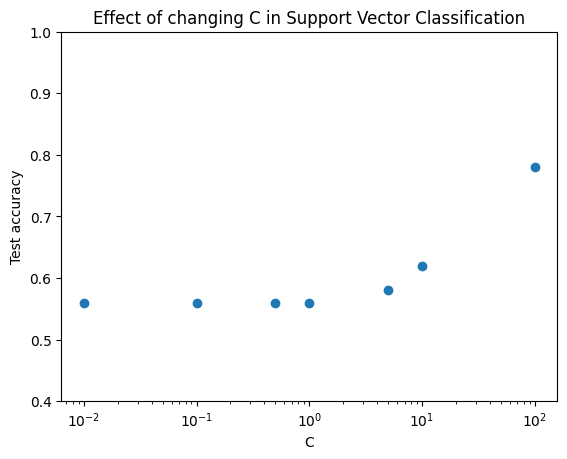

In [19]:
# to show effect of changing C with a constant kernel with default = 'rbf'
SVC_chart_C =  SVC_chart[SVC_chart['kernel'] == 'rbf']
# create scatter plot
plt.scatter(SVC_chart_C['C'], SVC_chart_C['Test accuracy'])
plt.xlabel('C')
plt.xscale('log') # doing this to better scale the plot even though it will cause x axis labels to be different
plt.ylabel('Test accuracy')
plt.ylim(.4, 1) # lower limit than LR because SVC has lower accuracies
plt.title('Effect of changing C in Support Vector Classification')
plt.show()

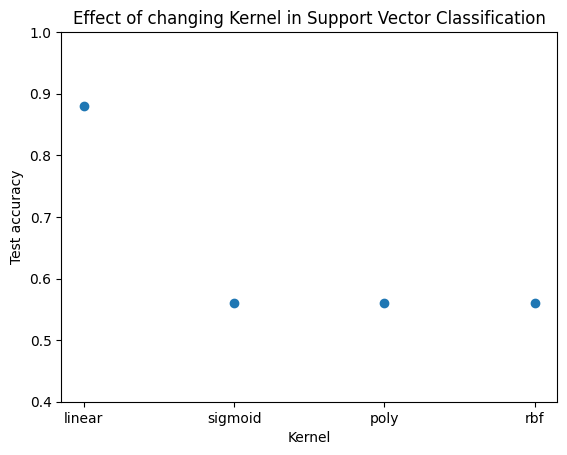

In [20]:
# to show effect of changing kernel with a constant C with default = 1
SVC_chart_kernel =  SVC_chart[SVC_chart['C'] == 1]
# create bar chart
plt.scatter(SVC_chart_kernel['kernel'], SVC_chart_kernel['Test accuracy'])
plt.xlabel('Kernel')
plt.ylabel('Test accuracy')
plt.ylim(.4, 1)
plt.title('Effect of changing Kernel in Support Vector Classification')
plt.show()

In [21]:
SVC_chart_kernel

,C,kernel,Training accuracy,Test accuracy
12,1.0,linear,0.915584,0.88
15,1.0,sigmoid,0.512987,0.56
13,1.0,poly,0.512987,0.56
14,1.0,rbf,0.512987,0.56


When both hyperparemeters were tuned, the chart showed the best results were C = 10 and linear kernel. However, when indiviudally tuned with default settings, the best performing was C = 100 for C, and linear for kernel.